In [1]:
#In this project, we will be building a Convolutional Neural Network to classify 2D brain scans into four categories. I chose
#this project out of my newfound interest in Neurology that I gained through studing Artificial Intelligence and Artificial 
#Neurons. A topic I grapple with regularly is the inequeivalence between artificial and organic neurons, as well as what seems
#like the drastically different manners in which they learn. Hence, I often ask myself in what ways could we build better 
#artifical neurons? And in what ways could we build better network architectures that more closely mimic the human brain? It is
#these types of questions which has spurred my interest in neurology, and hence provided the inspiration for this project.

#Note that the original dataset can be found here: https://www.kaggle.com/datasets/masoudnickparvar/brain-tumor-mri-dataset

import tensorflow as tf
import keras
from keras.layers import Dense, Flatten, Resizing, CenterCrop, Conv2D, MaxPooling2D
from keras.models import Sequential
from PIL import Image
import glob
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import image as mpimg

Found 5712 files belonging to 4 classes.
Using 4570 files for training.
Found 5712 files belonging to 4 classes.
Using 1142 files for validation.
Found 5712 files belonging to 4 classes.
Using 4570 files for training.


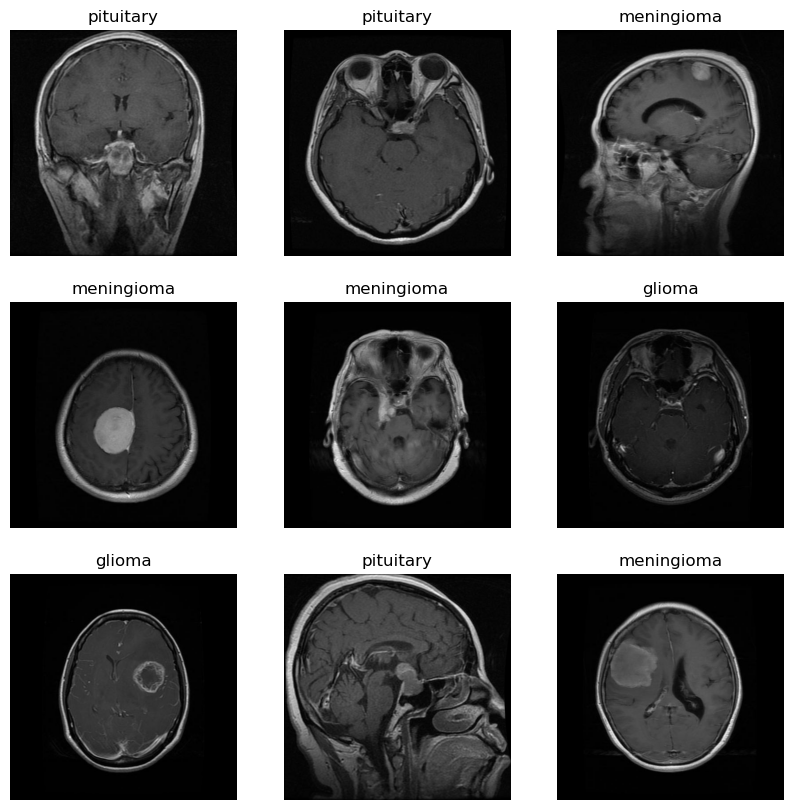

In [2]:
#Here, we'll spplit our data into training and testing sets. Keras facilitates this process by automatically detecting the 
#classes based on our folder architecture and greatly simplifies the training process. 
batch_size = 32
img_height = 512
img_width = 512
data_dir = r'C:\Users\hecto\OneDrive\Documents\Jupyter Notebook\Brain Image Data\archive\Training'

train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  labels="inferred",
  label_mode='categorical',
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  labels="inferred",
  label_mode='categorical',
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)




#Note: I am using the below dataset solely for visualization. The above datasets have label_mode = "categorical" which makes
#visualization more difficult, so I created this dummy dataset out of simplicity. 
visualization_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  labels="inferred",
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

class_names2 = visualization_ds.class_names

plt.figure(figsize=(10, 10))
for images, labels in visualization_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names2[labels[i]])
    plt.axis("off")

In [3]:
#Here, we'll build our convolution neural network. First, we standardize each image with the resizing layer before applying 
#convolution and max pooling. Finally, we feed the data to our fully connected layers, ending with an output layer with 4 
#neurons (corresponding to our 4 classes) which uses the softmax activation function. 
model = Sequential()

model.add(Resizing(height=128, width=128, crop_to_aspect_ratio=True))
model.add(Conv2D(64, kernel_size=5, activation= 'relu'))
model.add(MaxPooling2D())
model.add(Conv2D(64, kernel_size=3, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(64, kernel_size=3, activation= 'relu'))
#model.add(MaxPooling2D())
#model.add(Conv2D(64, kernel_size=3, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(50, activation = "relu"))
model.add(Dense(4, activation = "softmax"))
model.compile(optimizer = "adam", loss = "categorical_crossentropy", metrics=['accuracy'])

#With the architecture defined, we'll now train for 6 epochs. 
model.fit(train_ds, epochs = 6)

Epoch 1/6
143/143 [==============================] - 31s 214ms/step - loss: 2.6876 - accuracy: 0.5309
Epoch 2/6
143/143 [==============================] - 31s 217ms/step - loss: 0.7455 - accuracy: 0.6985
Epoch 3/6
143/143 [==============================] - 32s 220ms/step - loss: 0.4659 - accuracy: 0.8219
Epoch 4/6
143/143 [==============================] - 32s 221ms/step - loss: 0.3498 - accuracy: 0.8689
Epoch 5/6
143/143 [==============================] - 32s 223ms/step - loss: 0.3037 - accuracy: 0.8827
Epoch 6/6
143/143 [==============================] - 33s 227ms/step - loss: 0.2511 - accuracy: 0.8961


In [4]:
model.predict(val_ds)
result = model.evaluate(val_ds)

print("Our CNN validation accuracy is: {}".format(result))

36/36 [==============================] - 3s 63ms/step - loss: 0.3202 - accuracy: 0.8774
Our CNN validation accuracy is: [0.3202109932899475, 0.8774080276489258]


In [ ]:
#We've successfully built a Convolutional Neural Network capable of classifying four different types of brain pathologies with 
#nearly a 90% accuracy! In a clinical setting, I would suggest building a more robust model via randomized data augmentation. 
#Moreover, I would want to see an in-depth study where the model parameters are adjusted and the corresponding performance 
#tracked, in order to optimize the tradeoff between model complexity, training time, and computational resources consumed to 
#produce a given accuracy. However, for the sake of this project, I consider this a good first step! This concludes the notebook